<a href="https://colab.research.google.com/github/Felipe-dscarvalho/Felipe-dscarvalho/blob/main/Customer_segmentation_Kmeans_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings('ignore')


# Importanto Kmeans e métrica silhouette
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Importando Scaler
from sklearn.preprocessing import StandardScaler

# Dendograma e hierarquias
from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customer_segmentation/db_customer_segmentation.csv')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Há 24 valores nulos na variável "Income", vamos preencher com a mediana pois trata-se de uma variável de salário.



In [8]:
df = df.dropna()

In [9]:
df['Income'].fillna(df['Income'].median(), inplace = True)


In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Criando novas colunas de features.
* **Idade:**  

Vamos calcular a idade de cada cliente a partir da coluna de aniversário e ano de nascimento.

* **Gasto:**

Total gasto pelos clientes nas categorias.

* **Moradia**

Criando outra coluna com "Livin_With" a partir de "Marital_status" para extrair a situação de vida dos casais.

* **Crianças**

Coluna destinada para verificar se há crianças ou adolescentes em cada casa.

* **Tamanho_da_familia**

Para obter mais clareza sobre o domicílio, crie o recurso que indica "Family_size".

* **status_parentesco**

coluna para indicar o status parental.


* **Educação**
Simplificando a coluna "education" em 3 categorias.



In [16]:
#Idade do Cliente
df['Age'] = 2015 - df['Year_Birth']

In [18]:
# Total gastos nos itens

df['Gasto_anual'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [21]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
# Estado civil
df["Living_With"] = df["Marital_Status"].replace({"Single":"Alone", "Married":"Partner","Together":"Partner",
                                                  "Absurd":"Alone","Widow":"Alone",
                                                  "YOLO":"Alone","Divorced":"Alone"})

In [28]:
# Quantidade de adolescentes e crianças no domicílio.
df["Children"] = df["Kidhome"] + df["Teenhome"]

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

df["Is_Parent"] = np.where(df.Children > 0, 1, 0)


In [29]:
# Separando a coluna de "Educação" em 3 grupos

df["Education"] = df["Education"].replace({"Basic":"Undergraduate"
,"2n Cycle":"Undergraduate", "Graduation":"Graduate"
,"Master":"Postgraduate", "PhD":"Postgraduate"})

In [31]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wine,...,Z_CostContact,Z_Revenue,Response,Age,Customer_desde,Gasto_anual,Living_With,Children,Family_Size,Is_Parent
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,3,11,1,58,57283200000000000,1617,Alone,0,1,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,3,11,0,61,9763200000000000,27,Alone,2,3,1
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,3,11,0,50,26956800000000000,776,Partner,0,2,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,3,11,0,31,12009600000000000,53,Partner,1,3,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,11,0,34,13910400000000000,422,Partner,1,3,1


### Criando tempo da última compra


In [32]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], dayfirst=True)
datas = []
for i in df["Dt_Customer"]:
    i = i.date()
    datas.append(i)

print("Data de inscrição do cliente mais recente nos registros:",max(datas))
print("Data de inscrição do cliente mais antigo nos registros:",min(datas))

Data de inscrição do cliente mais recente nos registros: 2014-06-29
Data de inscrição do cliente mais antigo nos registros: 2012-07-30


In [33]:
#Criando coluna da data da inscrição do cliente.
dias = []
d1 = max(datas)
for i in datas:
  delta = d1-i
  dias.append(delta)
df["Customer_desde"] = dias
df["Customer_desde"] = pd.to_numeric(df["Customer_desde"], errors = "coerce")


### Relação entre status conjugal e educacional


In [36]:
print("Total de categorias na classe Marital_status:\n", df["Marital_Status"].value_counts(),"\n")
print("Total de categorias na classe Livin_with:\n", df["Living_With"].value_counts(),"\n")
print("Total de categorias na classe educacional_status:\n", df["Education"].value_counts())

Total de categorias na classe Marital_status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total de categorias na classe Livin_with:
 Living_With
Partner    1430
Alone       786
Name: count, dtype: int64 

Total de categorias na classe educacional_status:
 Education
Graduate         1116
Postgraduate      846
Undergraduate     254
Name: count, dtype: int64


Definindo gasto anual dos clientes

In [38]:
df = df.rename(columns = {"MntWines":"Wine", "MntFruits":"Fruits", "MntMeatProducts":"Meat", "MntFishProducts":"Fish", "MntSweetProducts":"Sweets", "MntGoldProds":"Gold"})

drop_columns = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]

In [39]:
df = df.drop(drop_columns, axis = 1)


In [42]:
#Observando o dataset de forma mais clara e com algumas novas colunas.
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wine,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Age,Customer_desde,Gasto_anual,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,58,57283200000000000,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,61,9763200000000000,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,50,26956800000000000,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,31,12009600000000000,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,34,13910400000000000,422,Partner,1,3,1


In [46]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wine',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Age',
       'Customer_desde', 'Gasto_anual', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

## Seleção de Features para analises de gráficos.

In [49]:
df_plot1 = df[['Income', 'Recency','Customer_desde', 'Age','Gasto_anual','Is_Parent']]

<Figure size 1200x800 with 0 Axes>

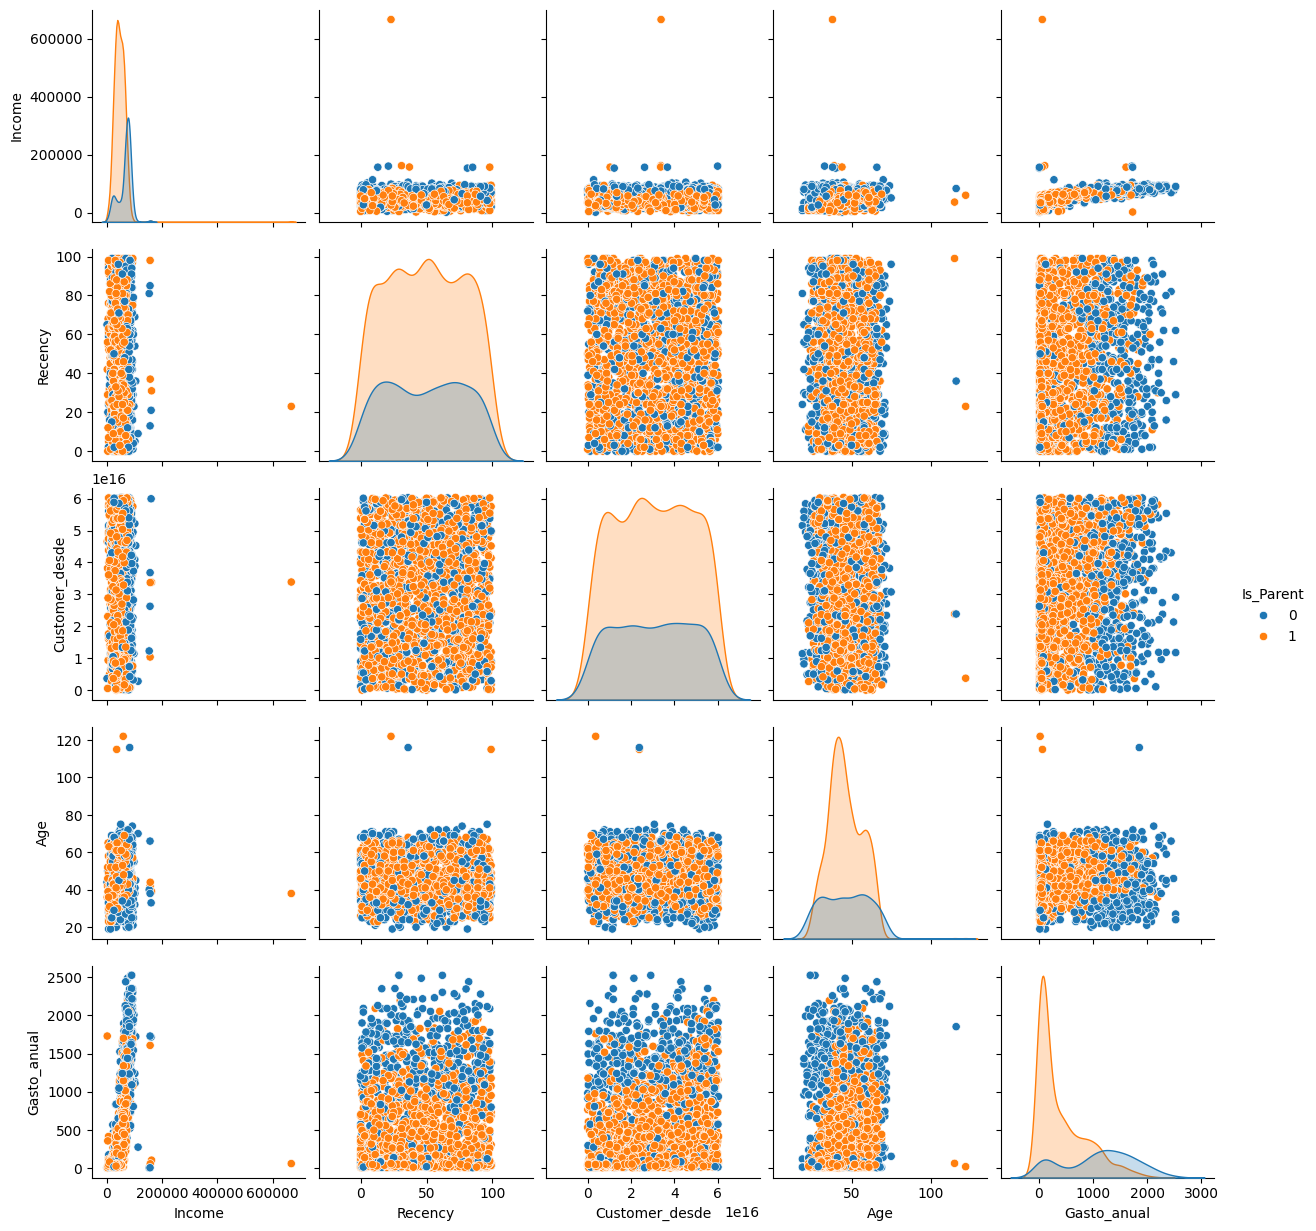

In [52]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=df_plot1, hue = 'Is_Parent')
plt.show()


Pode-se observar que na coluna de rendimento anual temos valores fora da curva, conhecidos como _Outliers_.

Antes do outlier(2240, 4)
Depois do outlier(2239, 4)


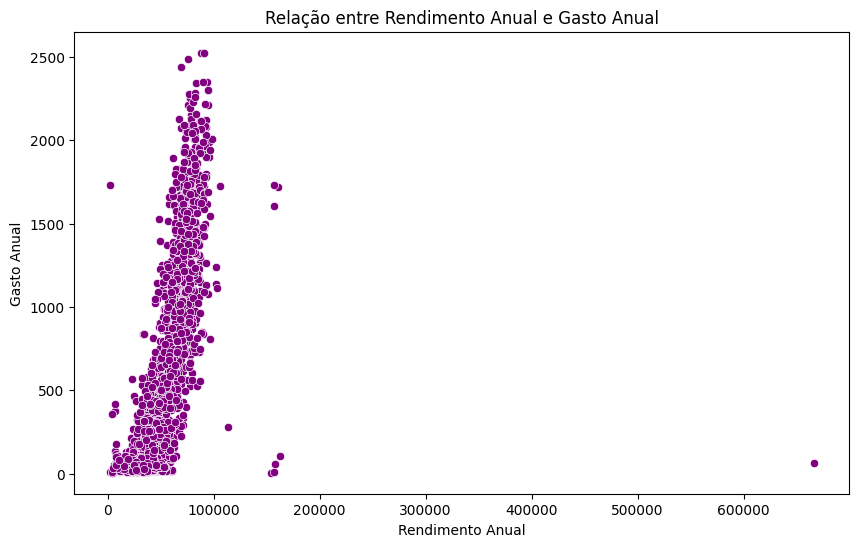

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Gasto_anual', c= 'purple', data=df)
plt.title('Relação entre Rendimento Anual e Gasto Anual')
plt.xlabel('Rendimento Anual')
plt.ylabel('Gasto Anual')
plt.show()


In [ ]:
print(f"\nCorrelação entre Idade_em_2014 and Gasto: {df['Gasto_anual'].corr(df['Rendimento_anual'])}")


Correlação entre Idade_em_2014 and Gasto: 0.789295785316152


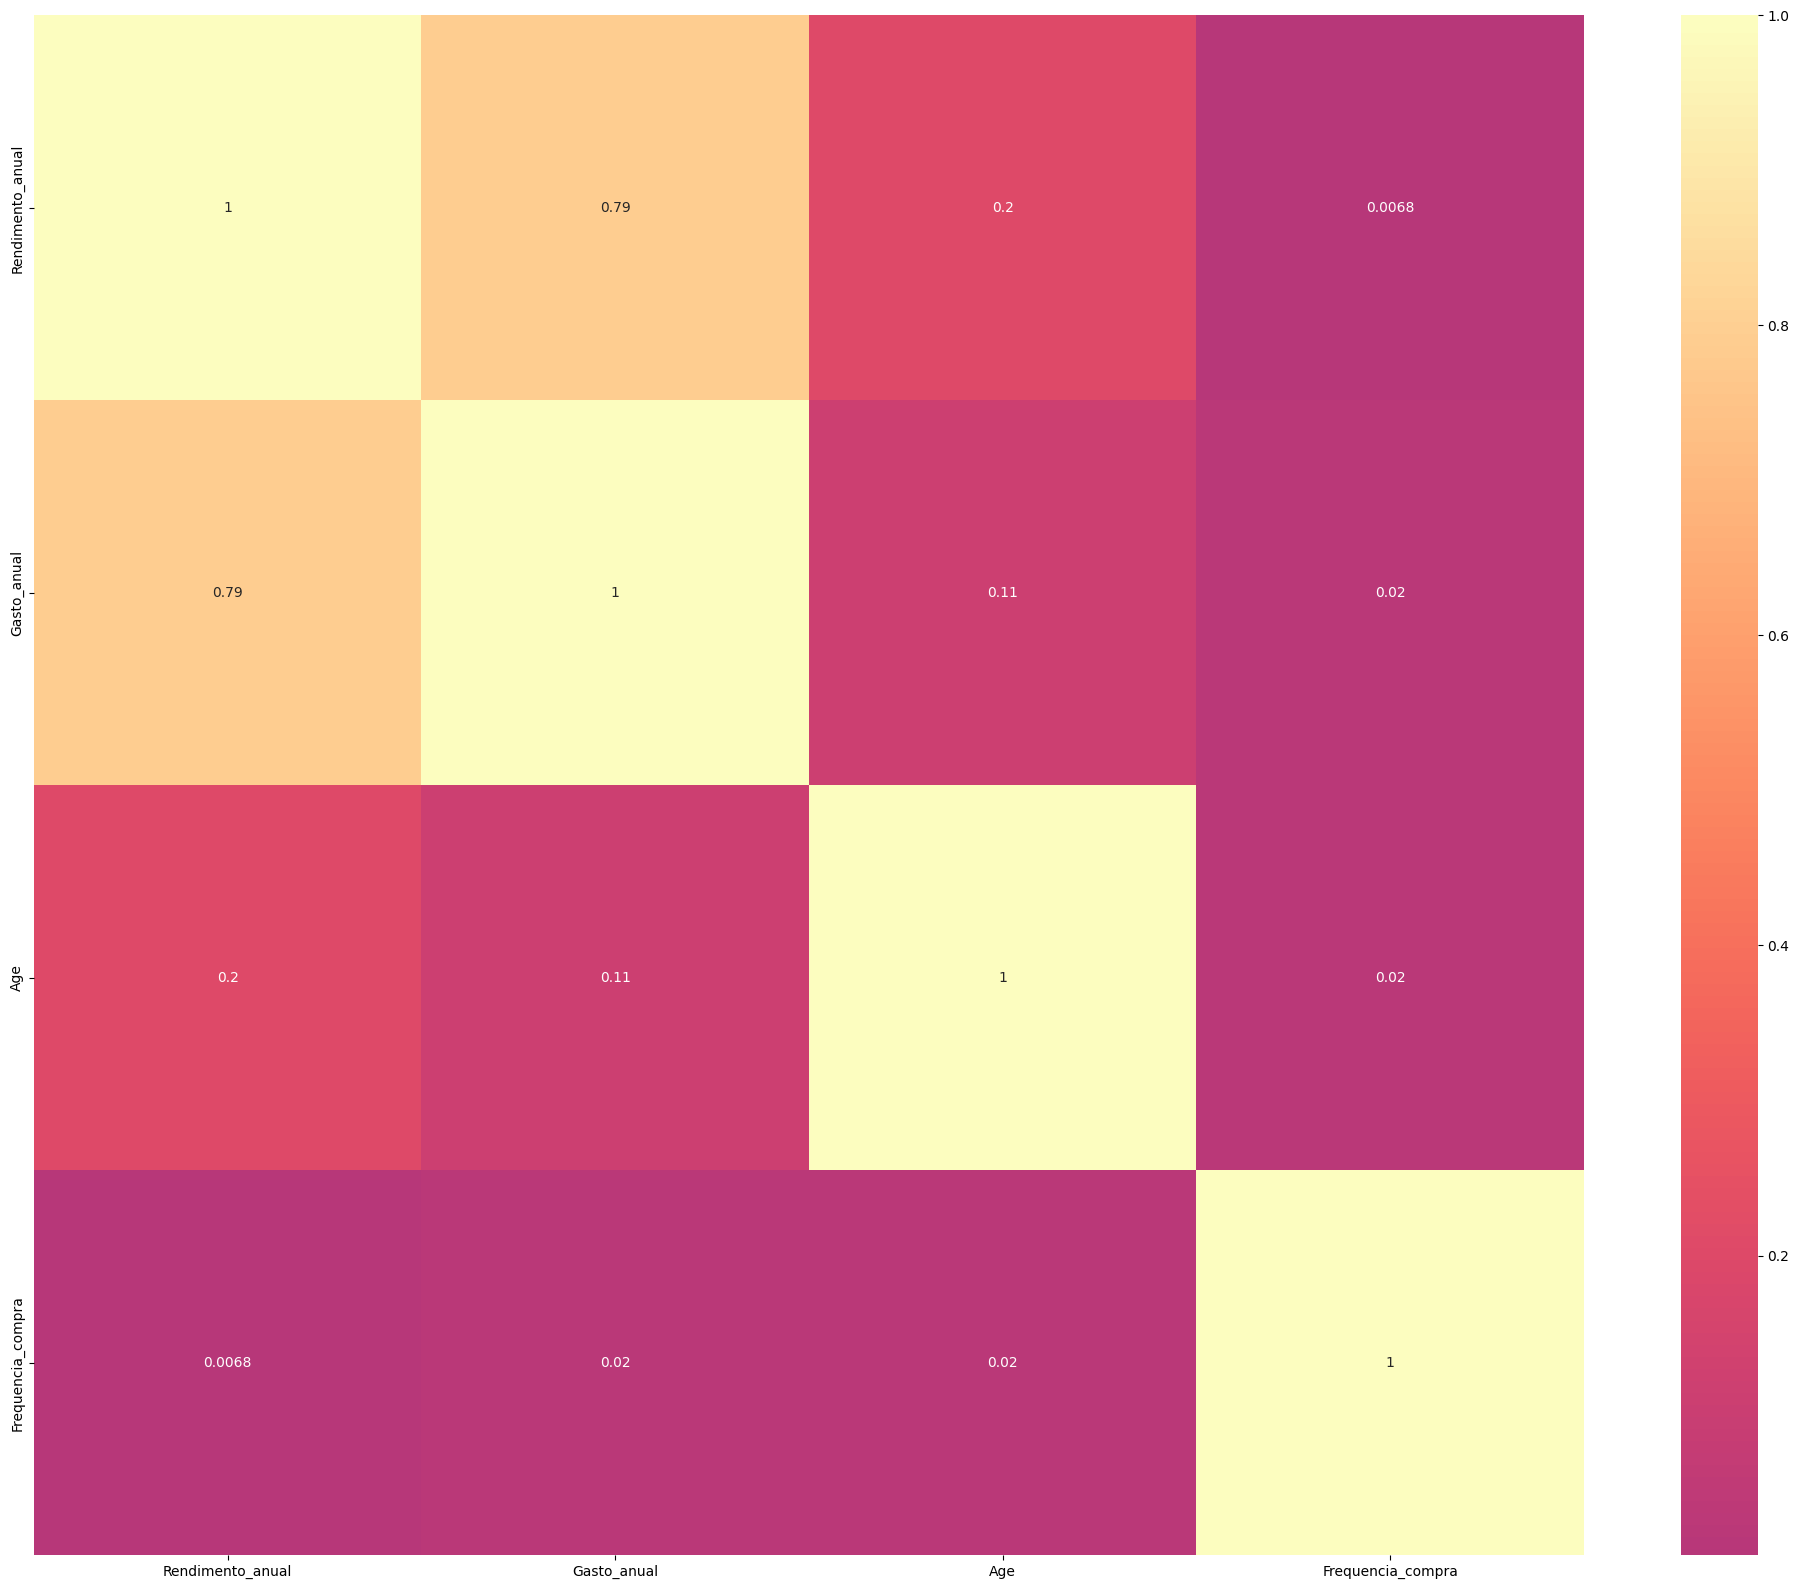

In [ ]:
corrmax = df.corr()
plt.figure(figsize = (25, 20))
sns.heatmap(corrmax, annot = True, cmap = 'magma', center = 0)
plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)


In [ ]:
#df_scaled.columns = df.columns
df_scaled.columns = ['Rendimento_anual', 'Gasto_anual', 'Age', 'Frequencia_compra']

In [ ]:
df_scaled.head()

,Rendimento_anual,Gasto_anual,Age,Frequencia_compra
0,0.288446,1.678944,0.984922,0.306624
1,-0.262524,-0.961639,1.235281,-0.384051
2,0.917946,0.282258,0.317300,-0.798456
3,-1.182738,-0.918460,-1.268304,-0.798456
4,0.295687,-0.305645,-1.017946,1.549838


In [ ]:
features = ['Rendimento_anual', 'Gasto_anual', 'Age', 'Frequencia_compra']

X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.fit_predict(X_scaled)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
cluster_names = ['Bronze', 'Silver', 'Gold']


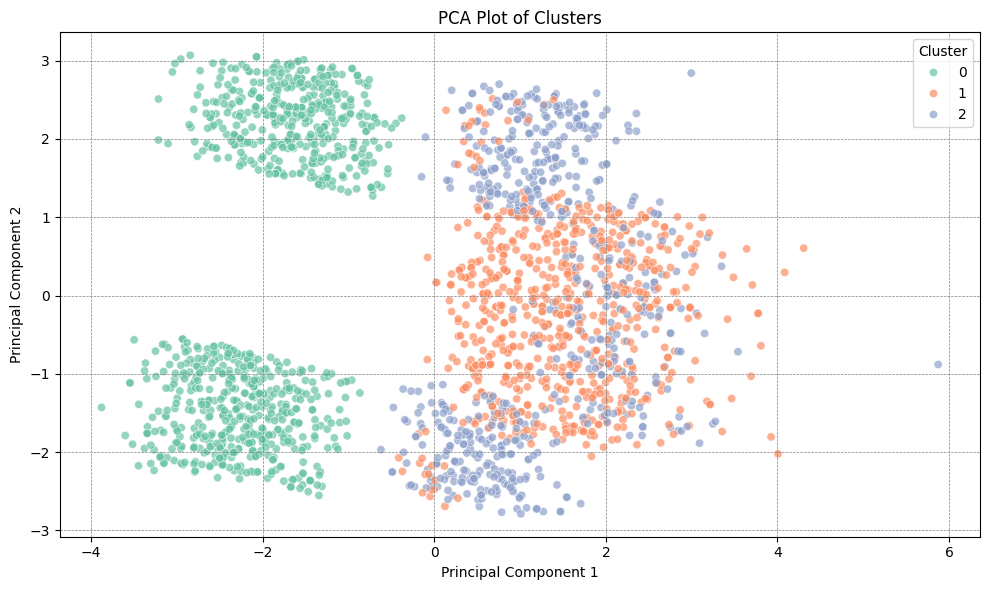

In [ ]:
from sklearn.decomposition import PCA

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df['PC1'] = pca_data[:, 0]
df['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df['Cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(df, x = 'PC1', y = 'PC2', hue = 'Cluster', palette = cluster_palette, alpha = 0.7)

plt.title("PCA Plot of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title = 'Cluster')


plt.show()